In [1]:
import pandas as pd

df = pd.read_csv("Dataset .csv")   # example: zomato.csv
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [2]:
# Check unique cuisines and first few rows
df[['Restaurant Name', 'Cuisines', 'Aggregate rating']].head()

# Check for missing values
df['Cuisines'].isnull().sum()


np.int64(9)

In [3]:
df['Cuisines'].fillna('Unknown', inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_3796\863532844.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cuisines'].fillna('Unknown', inplace=True)


In [4]:
from collections import Counter

# Split cuisines by comma
cuisine_combinations = df['Cuisines'].apply(lambda x: tuple(sorted(x.split(', '))))

# Count frequency of each combination
combination_counts = Counter(cuisine_combinations)

# Most common 10 combinations
most_common_combinations = combination_counts.most_common(10)
for combo, count in most_common_combinations:
    print(f"{combo}: {count}")


('North Indian',): 936
('Chinese', 'North Indian'): 616
('Mughlai', 'North Indian'): 394
('Chinese',): 354
('Fast Food',): 354
('Chinese', 'Mughlai', 'North Indian'): 306
('Cafe',): 299
('Bakery',): 218
('Bakery', 'Desserts'): 181
('Chinese', 'Fast Food'): 159


In [5]:
# Group by cuisine combination and calculate mean rating
combination_rating = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
print("Top 10 cuisine combinations by average rating:\n", combination_rating)


Top 10 cuisine combinations by average rating:
 Cuisines
Italian, Deli                      4.9
American, Coffee and Tea           4.9
American, BBQ, Sandwich            4.9
BBQ, Breakfast, Southern           4.9
Italian, Bakery, Continental       4.9
American, Burger, Grill            4.9
Hawaiian, Seafood                  4.9
Mexican, American, Healthy Food    4.9
American, Caribbean, Seafood       4.9
Mughlai, Lucknowi                  4.9
Name: Aggregate rating, dtype: float64


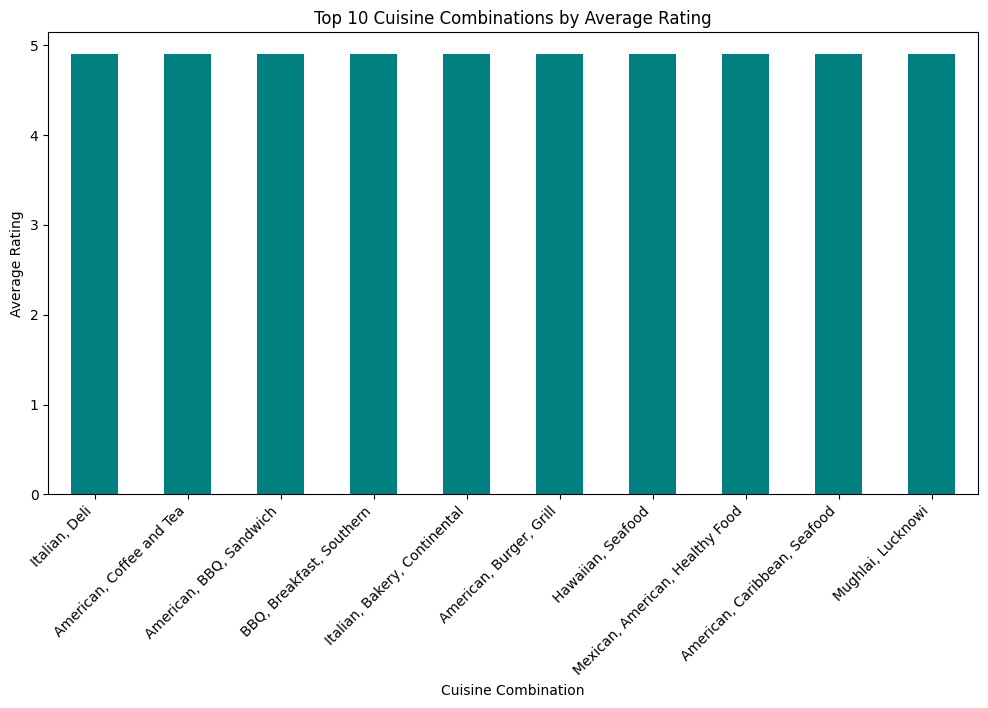

In [6]:
import matplotlib.pyplot as plt

combination_rating.plot(kind='bar', figsize=(12,6), color='teal')
plt.title('Top 10 Cuisine Combinations by Average Rating')
plt.ylabel('Average Rating')
plt.xlabel('Cuisine Combination')
plt.xticks(rotation=45, ha='right')
plt.show()


In [7]:
# Filter combinations that occur at least 5 times
frequent_combinations = df.groupby('Cuisines').filter(lambda x: len(x) >= 5)
frequent_avg_rating = frequent_combinations.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
print(frequent_avg_rating.head(10))


Cuisines
North Indian, European, Mediterranean    4.460000
Burger                                   4.450000
Modern Indian                            4.345455
Indian                                   4.250000
International                            4.233333
Italian, Pizza, Sandwich                 4.220000
French                                   4.185714
Steak                                    4.185714
Cafe, Bakery, Desserts                   4.166667
Cafe, Italian, Continental               4.150000
Name: Aggregate rating, dtype: float64


1.Most common combinations → see which cuisines are frequently paired.

2.Highest-rated combinations → identify which pairings tend to perform better in ratings.